In [ ]:
# Nilesh Aapparao Kale (AI3005)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:/Users/nilesh/Downloads/ToyotaCorolla - ToyotaCorolla.csv")
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90.0,1,0,2000,3,1165
1,13750,23,72937,Diesel,90.0,1,0,2000,3,1165
2,13950,24,41711,Diesel,90.0,1,0,2000,3,1165
3,14950,26,48000,Diesel,90.0,0,0,2000,3,1165
4,13750,30,38500,Diesel,90.0,0,0,2000,3,1170


In [ ]:
df.dtypes

Price          int64
Age            int64
KM             int64
FuelType      object
HP           float64
MetColor       int64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object

In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1432.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.386872,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.611428,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,89.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     3
HP           4
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
#Fill with median() for numerical values
df['HP'].fillna(df['HP'].median(), inplace=True)

In [ ]:
#fill with mode for categorical/ non-numeric values
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.410864,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.598114,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [ ]:
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

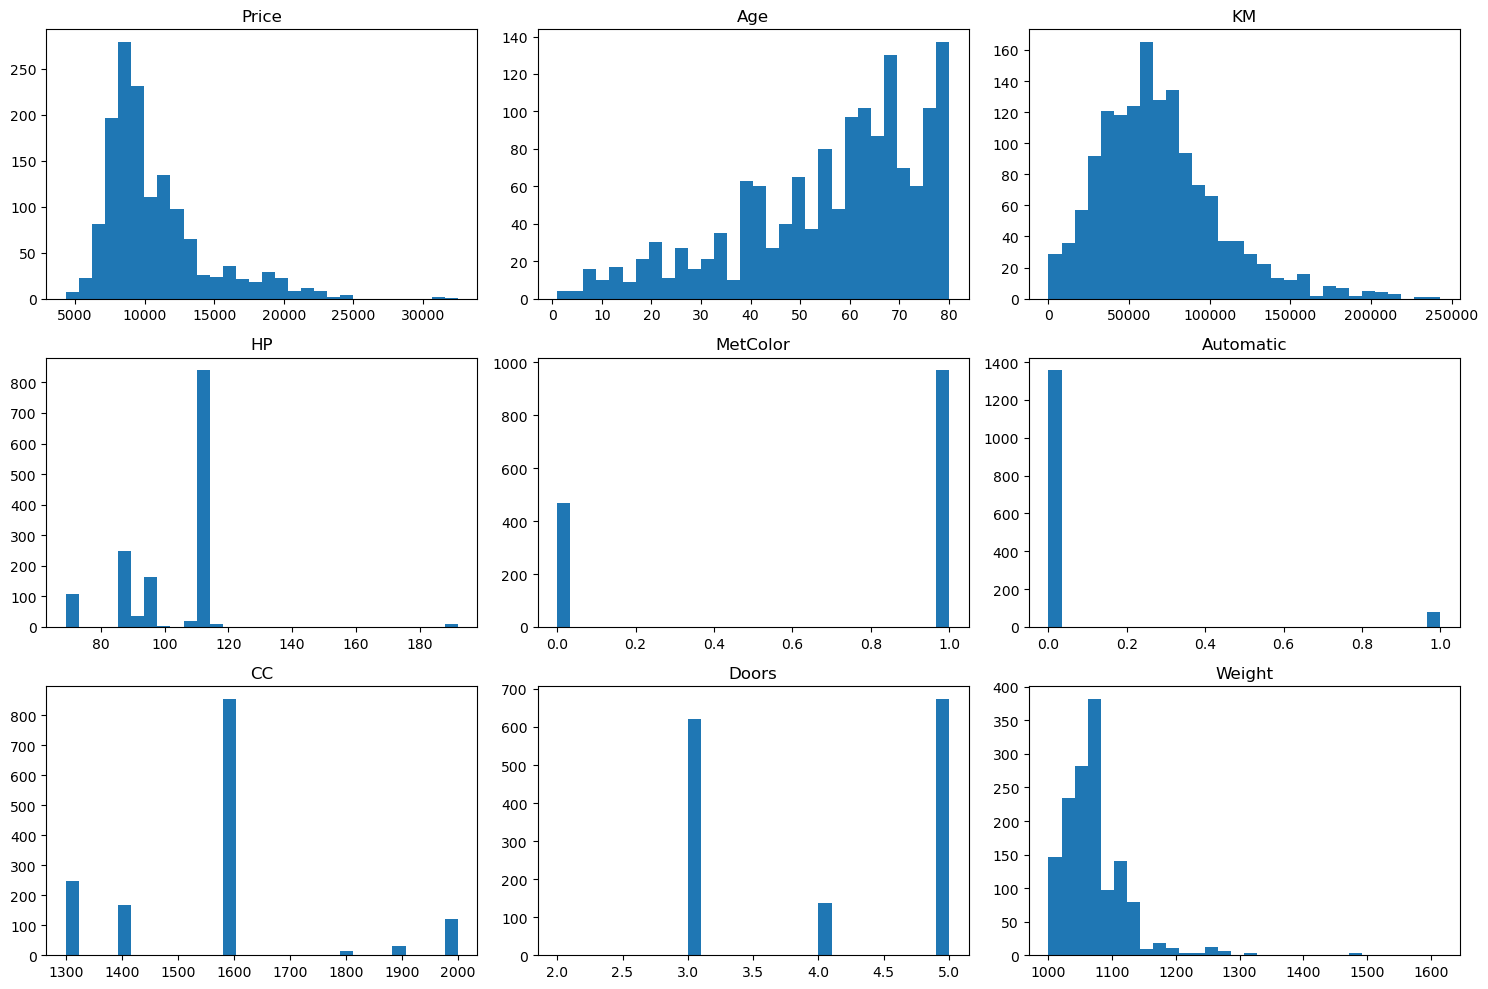

In [ ]:
columns = ['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors','Weight']
num_columns = len(columns)
nrows = (num_columns + 2) // 3
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(columns):
    axes[i].hist(df[column].dropna(), bins=30) # Drop NA values for plotting
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

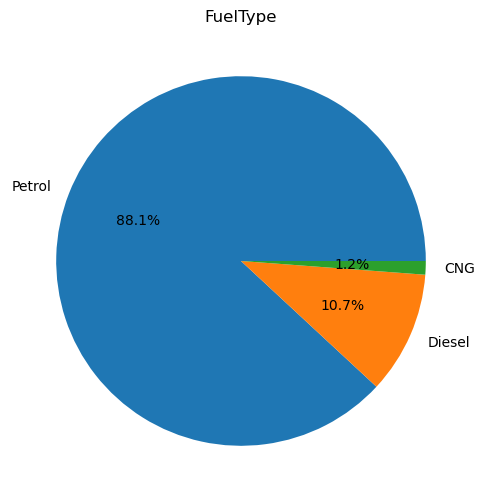

In [ ]:
fuel_type_counts = df['FuelType'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(fuel_type_counts, labels = fuel_type_counts.index, autopct='%1.1f%%')
plt.title('FuelType')
plt.show()

In [ ]:
df.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [ ]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
cat_encoded = encoder.fit_transform(df[['FuelType']])
cat_encoded

,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [ ]:
df1 = pd.concat([df,cat_encoded],axis=1)
df1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
1,13750,23,72937,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
2,13950,24,41711,Diesel,90.0,1,0,2000,3,1165,0.0,1.0,0.0
3,14950,26,48000,Diesel,90.0,0,0,2000,3,1165,0.0,1.0,0.0
4,13750,30,38500,Diesel,90.0,0,0,2000,3,1170,0.0,1.0,0.0


In [ ]:
df1.drop(['FuelType'], axis=1, inplace=True)

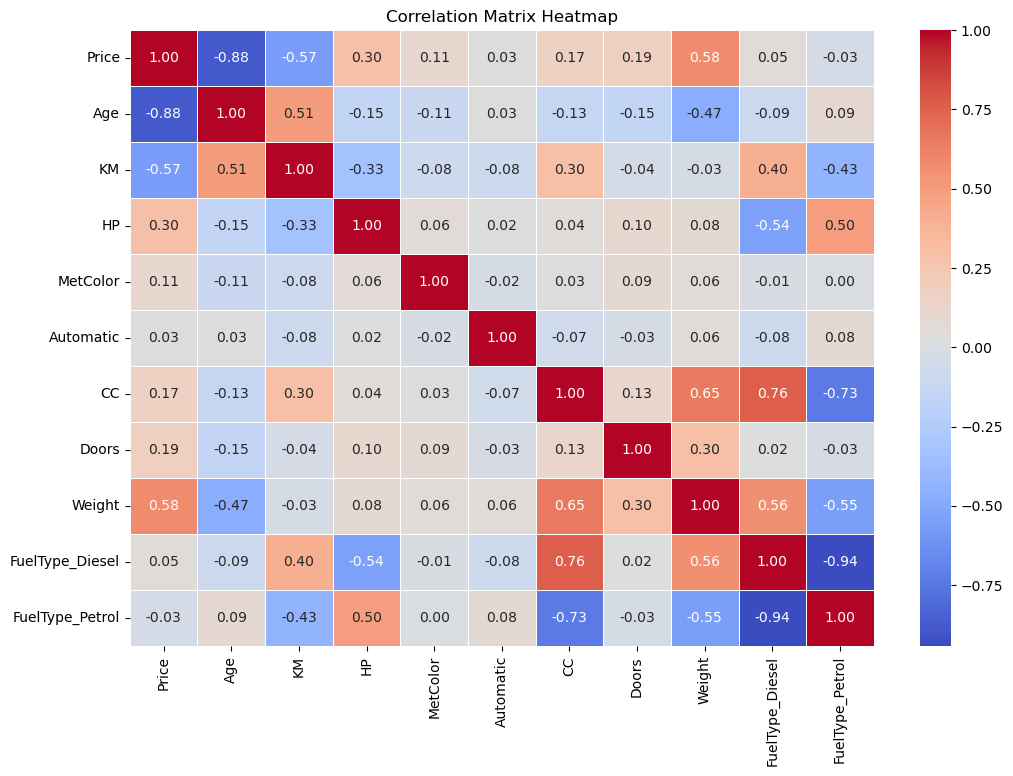

In [ ]:
correlation_matrix = df1[['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic','CC', 'Doors', 'Weight', 'FuelType_Diesel', 'FuelType_Petrol']].corr()
#print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df1.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

In [ ]:
x=df1[['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors','Weight', 'FuelType_Diesel', 'FuelType_Petrol']]
y=df1[['Price']]
x.shape

(1436, 10)

In [ ]:
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.3)

In [ ]:
lr= LinearRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

In [ ]:
print(x_test.shape,lr_predictions.shape)

(1005, 10) (1005, 1)


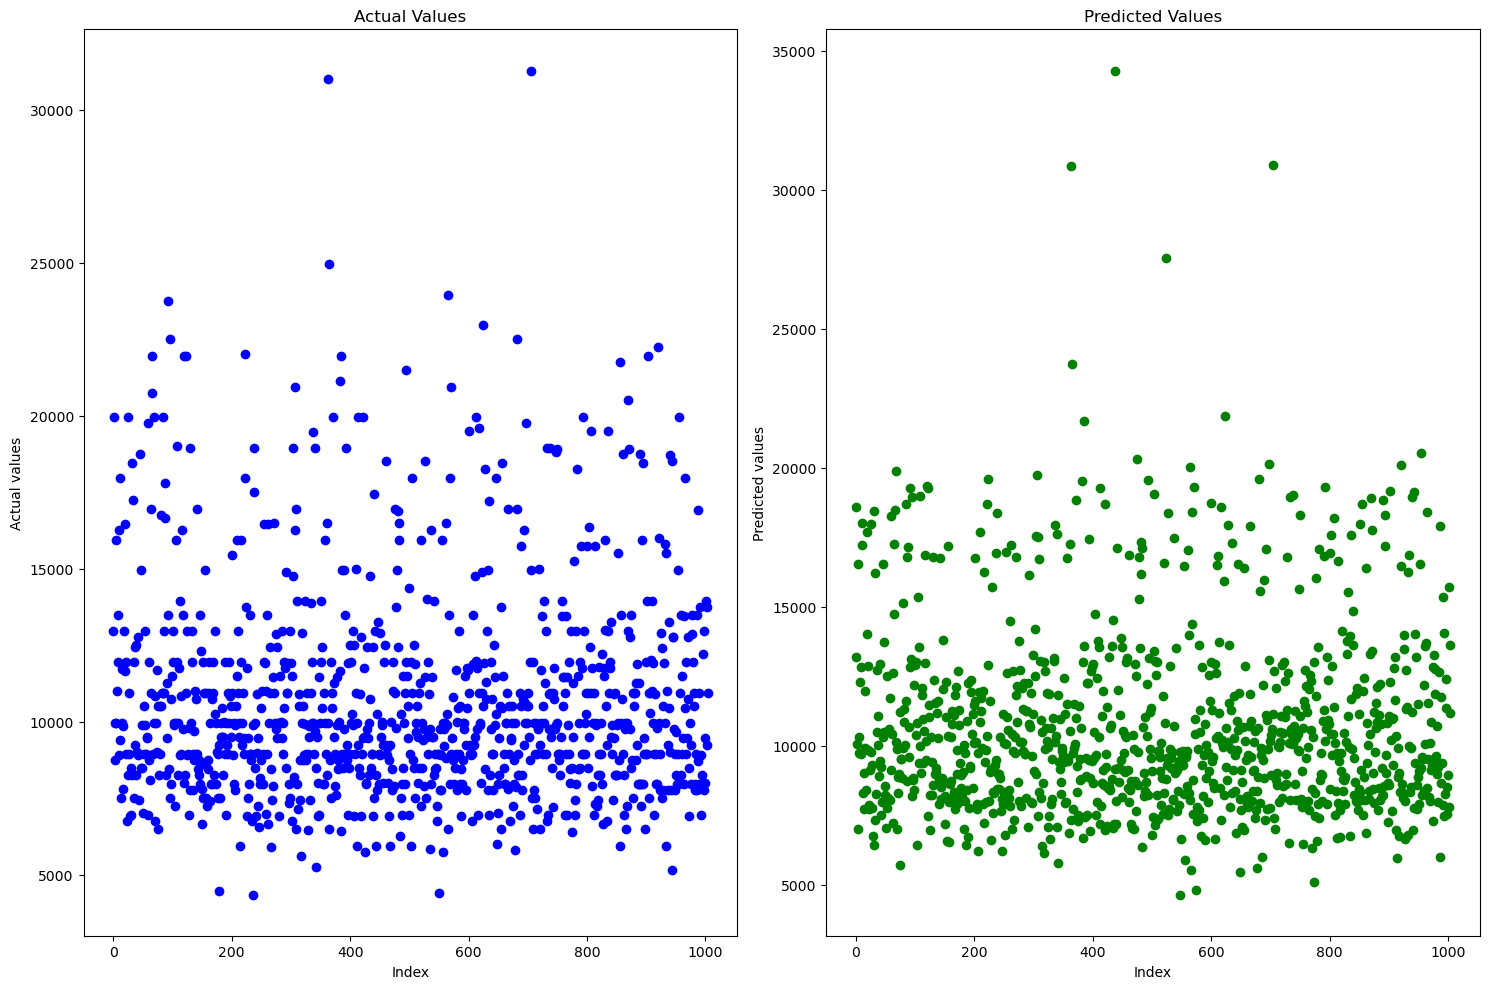

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# Plotting actual values in the first subplot
axs[0].scatter(range(len(y_test)), y_test, color='blue')
axs[0].set_title('Actual Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Actual values')
# Plotting predicted values in the second subplot
axs[1].scatter(range(len(lr_predictions)), lr_predictions, color='green')
axs[1].set_title('Predicted Values')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Predicted values')
# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculate metrics
mae = metrics.mean_absolute_error(y_test, lr_predictions)
mse = metrics.mean_squared_error(y_test, lr_predictions)
r2 = metrics.r2_score(y_test, lr_predictions)

In [ ]:
print(mae,mse,r2)

980.1783467379886 2332030.266974633 0.8141019556682803


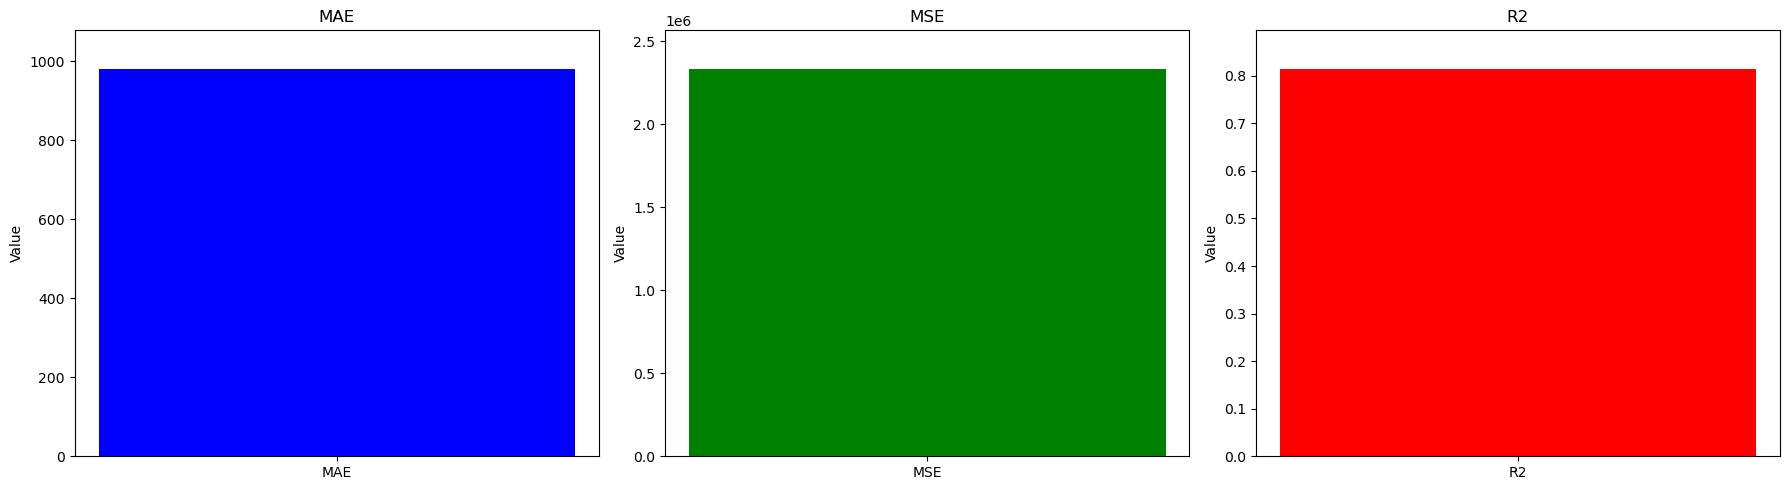

In [ ]:
# Prepare the data for plotting
metrics_values = [mae, mse, r2]
metrics_names = ['MAE', 'MSE', 'R2']
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Plot each metric in its own subplot with its own y-axis
for i, ax in enumerate(axs):
    ax.bar(metrics_names[i], metrics_values[i], color=['blue', 'green','red'][i])
    ax.set_title(metrics_names[i])
    ax.set_ylabel('Value')
    # Set the y-axis limit to accommodate the different scales
    ax.set_ylim(0, metrics_values[i] * 1.1) # Add a bit of space above the bar

    # Display the plots
plt.tight_layout()
plt.show()